#Data Dictionnary

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import libraries


In [3]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
import matplotlib.pyplot as plt

# import graph objects as "go"
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
import plotly.figure_factory as ff


%matplotlib inline

# Data Exploration

In [4]:
data=pd.read_csv('/content/drive/My Drive/AE_PJ/emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


##Problem 1 - Loading the Dataset

**Q1: **How many emails are in the dataset?


**A1: **5728

In [5]:
#len(data)
data.count()

text    5728
spam    5728
dtype: int64

**Q2: **How many emails are spam? 

**A2: **1369

In [6]:
data.value_counts("spam")

#data[data.spam==1].count()

spam
0    4360
1    1368
dtype: int64

**Q3:** Which word appears at the beginning of every email in the dataset? 

**A3:**Subject

In [7]:
# data
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


**Q4**: Could a spam classifier potentially benefit from including the frequency of the word that appears in every email?


**A4:** Yes -- the number of times the word appears might help us differentiate spam from ham.

**Explanation :**

For instance, a long email chain would have the word "subject" appear a number of times, and this higher frequency might be indicative of a ham message.

**Q5:** How many characters are in the longest email in the dataset (where longest is measured in terms of the maximum number of characters)?

**A5:** 43952


In [8]:
#How long is the longest MAIL?
length_text = data.text.str.len()
max(length_text)


43952

##Problem 2: Data Pre-Processing

In [9]:
#Preparing the Corpus
#Convert data to lower case
corpus = data['text'].str.lower()

In [10]:
#Remove punctuation 
corpus = corpus.str.replace('[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n]','')

In [11]:
corpus.head()

0    subject naturally irresistible your corporate ...
1    subject the stock trading gunslinger  fanny is...
2    subject unbelievable new homes made easy  im w...
3    subject 4 color printing special  request addi...
4    subject do not have money  get software cds fr...
Name: text, dtype: object

In [12]:
#Removing Stop words and stemming

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords 
nltk.download('stopwords') 

from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

# Define the stopwords list
my_stopwords = set(stopwords.words('english'))

#function to remove stop words
def remove_stop_words(data):
    stop_words = my_stopwords
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text
    
#stemming function
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


corpus= corpus.apply(remove_stop_words).apply(stem_sentences)
corpus.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    subject natur irresist corpor ident lt realli ...
1    subject stock trade gunsling fanni merril muzo...
2    subject unbeliev new home made easi im want sh...
3    subject color print special request addit info...
4    subject money get softwar cd softwar compat gr...
Name: text, dtype: object

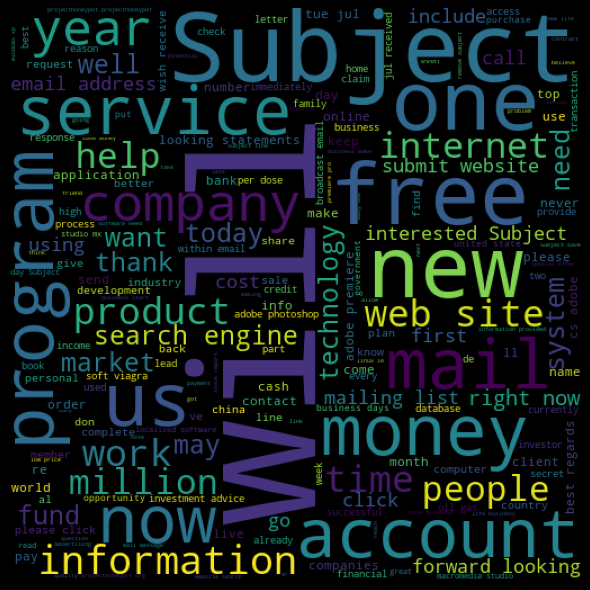

In [13]:
#Wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

spam_words = ' '.join(list(data[data['spam'] == 1]['text']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

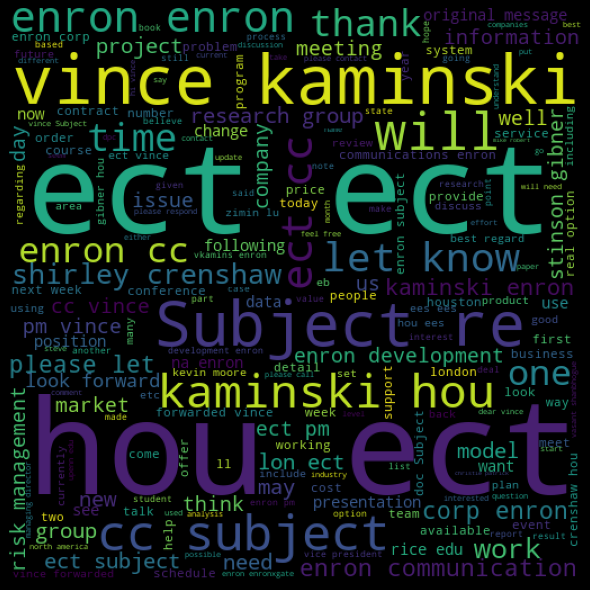

In [14]:
ham_words = ' '.join(list(data[data['spam'] == 0]['text']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [15]:
# Feature Extraction

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=330)
X = vect.fit_transform(corpus)

dtm = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

In [16]:
dtm.head()
dtm.shape

(5728, 330)

In [17]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(min_df=0.05, max_df=0.95) 
# Y=cv.fit_transform(data.text)
# # Y_df = pd.DataFrame(Y.toarray(), columns=vect.get_feature_names())
# # Y_df.head()


In [18]:
X_train, X_test, y_train, y_test = train_test_split(dtm, data['spam'], test_size=0.3,random_state=123)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4009, 330), (1719, 330), (4009,), (1719,))

##Problem 3: Building machine learning models


In [20]:
# # #Using Log reg

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
# Spam_model.fit(X_train, y_train)
# pred = Spam_model.predict(X_test)
# accuracy_score(y_test,pred)

#### CART Model

In [21]:
#Build CART Model
from sklearn.tree import  DecisionTreeClassifier
dtr = DecisionTreeClassifier(max_depth = 10)
dtr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

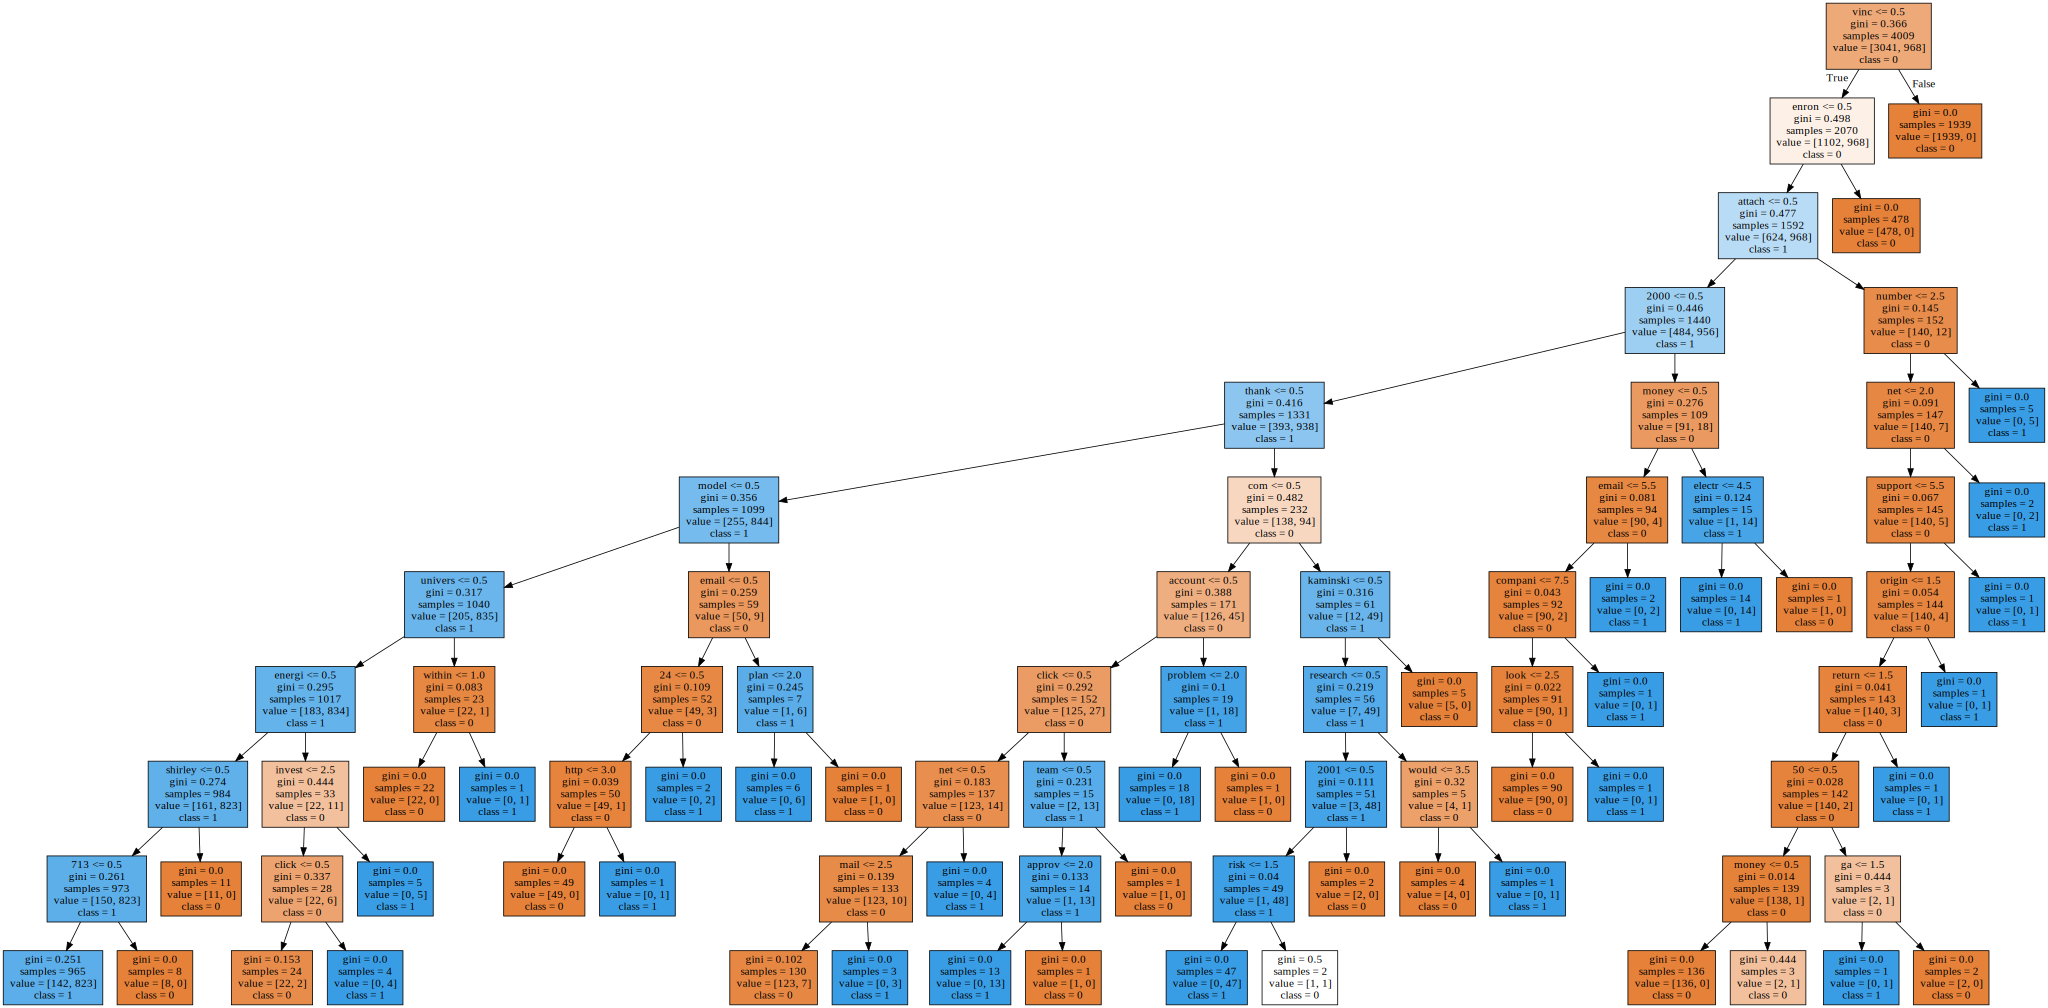

In [22]:
import graphviz

graphviz.Source(export_graphviz(dtr,
                                feature_names=dtm.columns,
                                filled=True,class_names=["0","1"]))

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

#####Evaluating

on training set

In [24]:

train_prediction = dtr.predict(X_train)

In [25]:
print('The mean absolute error',metrics.mean_absolute_error(y_train, train_prediction))
print('The accuracy:',metrics.accuracy_score(y_train, train_prediction))

The mean absolute error 0.0381641307059117
The accuracy: 0.9618358692940883


In [26]:
fpr, tpr, _ = roc_curve(y_train, train_prediction)

fig = px.line(x=fpr, y=tpr, title='ROC curve training set')
fig.show()

print('The AUC value on the training set is', roc_auc_score(y_train, train_prediction) )

The AUC value on the training set is 0.9709705987862846


On testing set

In [27]:
test_prediction = dtr.predict(X_test)

In [28]:
print('The Mean absolute error',metrics.mean_absolute_error(y_test, test_prediction))
print("The accuracy:",metrics.accuracy_score(y_test, test_prediction))

The Mean absolute error 0.05002908667830134
The accuracy: 0.9499709133216987


In [29]:
fpr, tpr, _ = roc_curve(y_test, test_prediction)

fig = px.line(x=fpr, y=tpr, title='ROC curve training set')
fig.show()

print('The AUC value on the testing set is', roc_auc_score(y_test, test_prediction) )

The AUC value on the testing set is 0.9534647460197119


###Random Forest

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

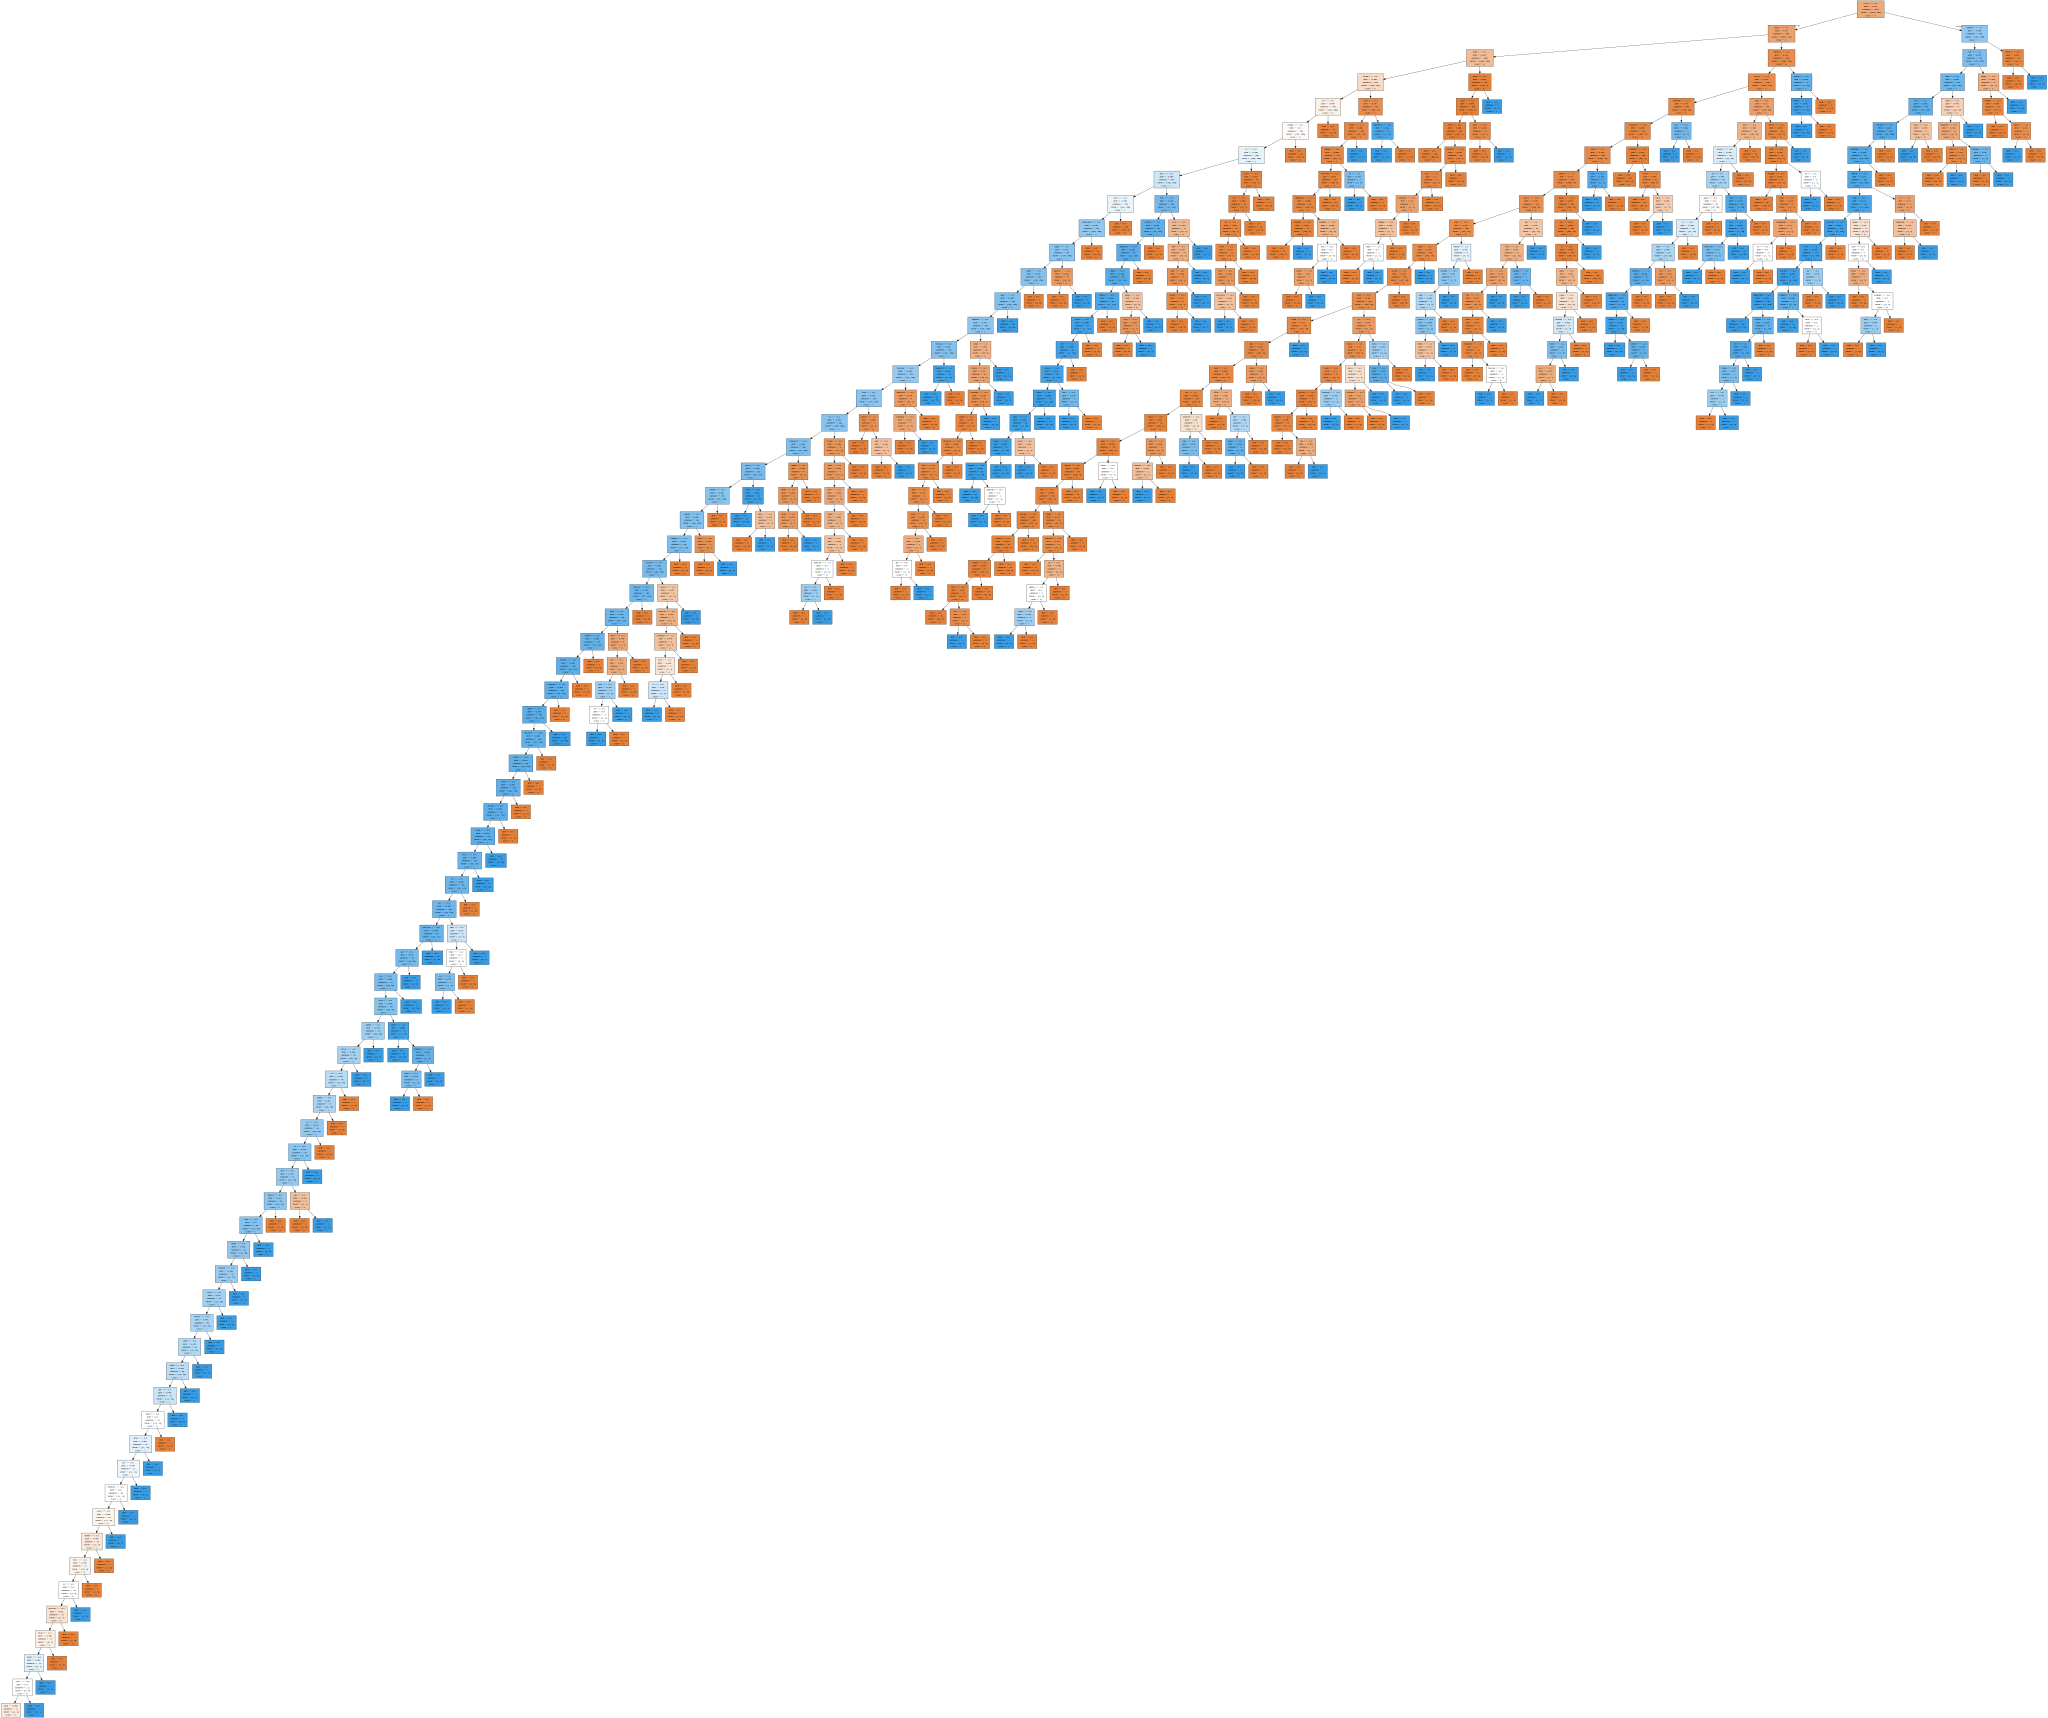

In [31]:
import graphviz

graphviz.Source(export_graphviz(rf.estimators_[1],
                                feature_names=dtm.columns,
                                filled=True,class_names=["0","1"]))

In [32]:
# print(rf.feature_importances_)

####Evaluating

on training set

In [33]:
y_train_pred=rf.predict(X_train)

In [34]:
print("The accuracy on the trainin set is:",metrics.accuracy_score(y_train, y_train_pred ))
print('The mean absolute error on the training set is of',metrics.mean_absolute_error(y_train, y_train_pred))

The accuracy on the trainin set is: 0.9987528061860813
The mean absolute error on the training set is of 0.001247193813918683


In [35]:
fpr, tpr, _ = roc_curve(y_train, y_train_pred)

fig = px.line(x=fpr, y=tpr, title='ROC curve training set')
fig.show()

print('The AUC value on the training set is', roc_auc_score(y_train, y_train_pred) )

The AUC value on the training set is 0.9974173553719008


On testing set

In [36]:
y_prediction = rf.predict(X_test)
y_prediction

array([0, 0, 0, ..., 0, 1, 0])

In [37]:
# Accuracy
print("The accuracy on the testing set is:",metrics.accuracy_score(y_test, y_prediction ))
print('The mean absolute error on the testing set is of',metrics.mean_absolute_error(y_test, y_prediction))

The accuracy on the testing set is: 0.9761489237929029
The mean absolute error on the testing set is of 0.02385107620709715


In [38]:
fpr, tpr, _ = roc_curve(y_train, y_train_pred)

fig = px.line(x=fpr, y=tpr, title='ROC curve training set')
fig.show()

print('The AUC value on the testing set is', roc_auc_score(y_test, y_prediction) )

The AUC value on the testing set is 0.959201099317665


In [39]:
rf.score(dtm, data['spam'])

0.9919692737430168

***RTF Classifier is more performant than the CART Model***

In [40]:
pip install pandasgui

In [43]:
from pandasgui import show
gui = show(data)

ImportError: ignored